In [2]:
import json
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import random


In [3]:
data_files_path = "./Data Visualization/data/"
image_files_path = "./Data Visualization/images/"


In [4]:
image_files = [os.path.join(image_files_path, i) for i in os.listdir(image_files_path)]
data_files = [os.path.join(data_files_path, i) for i in os.listdir(data_files_path)]

print(image_files)
print(data_files)


['./Data Visualization/images/1.jpg', './Data Visualization/images/2.jpg', './Data Visualization/images/3.jpg', './Data Visualization/images/4.jpg', './Data Visualization/images/5.jpg']
['./Data Visualization/data/1.json', './Data Visualization/data/2.json', './Data Visualization/data/3.json', './Data Visualization/data/4.json', './Data Visualization/data/5.json']


# TYPE 1 Visualization
### Where only transparent polygons are drawn

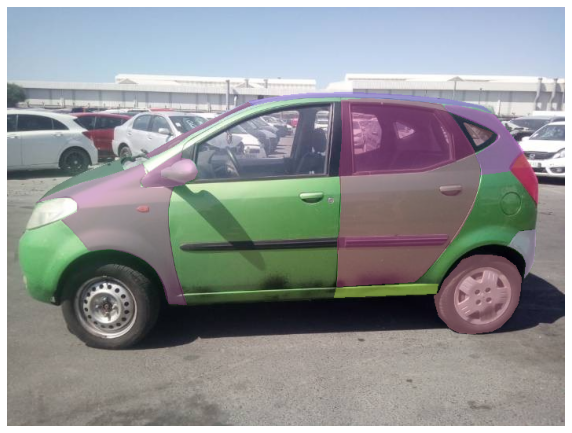

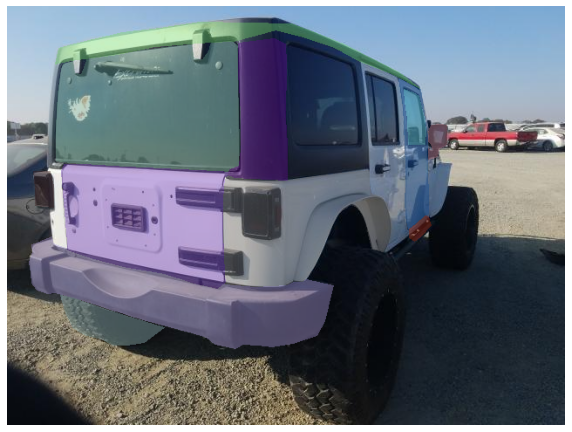

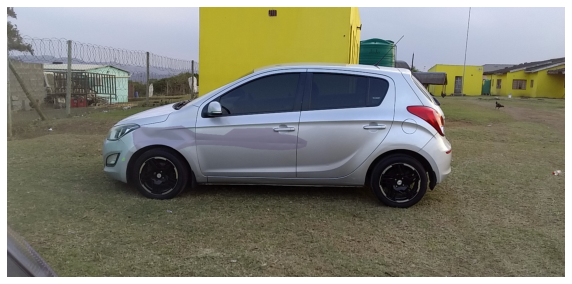

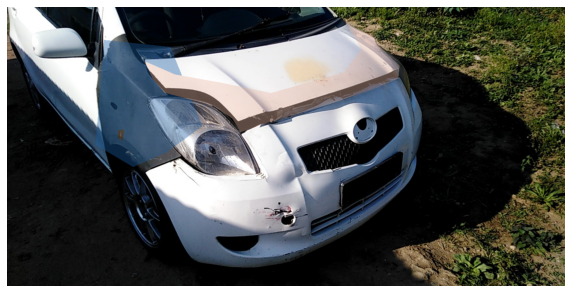

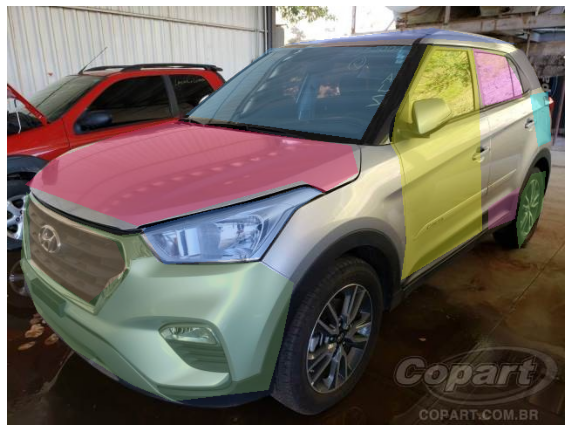

In [5]:
for image_file, data_file in zip(image_files, data_files):

    img = cv2.imread(image_file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    f = open(data_file)
    data = json.load(f)
    f.close()

    area = {}
    for i in range(len(data)):
        height, width, channels = img.shape
        try:
            x = []
            y = []
            label = data[i]["value"]["polygonlabels"]
            for point in data[i]["value"]["points"]:
                x.append(point[0])
                y.append(point[1])

            def denormalize(value, axis):
                if axis == "x":
                    return (value * width) / 100
                elif axis == "y":
                    return (value * height) / 100

            x = np.array([denormalize(i, "x") for i in x], np.int32)
            y = np.array([denormalize(i, "y") for i in y], np.int32)

            points = [[i, j] for i, j in zip(x, y)]

            label = data[i]["value"]["polygonlabels"][0]
            area[label] = points

        except:
            pass

    image = img.copy()
    overlay = image.copy()
    for label in list(area.keys()):
        r = random.randint(0, 255)
        g = random.randint(0, 255)
        b = random.randint(0, 255)
        rand_color = (r, g, b)

        pts = np.array(area[label])
        cv2.fillPoly(overlay, [pts], rand_color)
        alpha = 0.4
    out = cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0)
    plt.figure(figsize=(10, 10))
    plt.imshow(out)
    plt.axis("off")
    plt.show()


# Type 2 Visualization
### Where bounding boxes are drawn around them and class of polygons displayed on corner

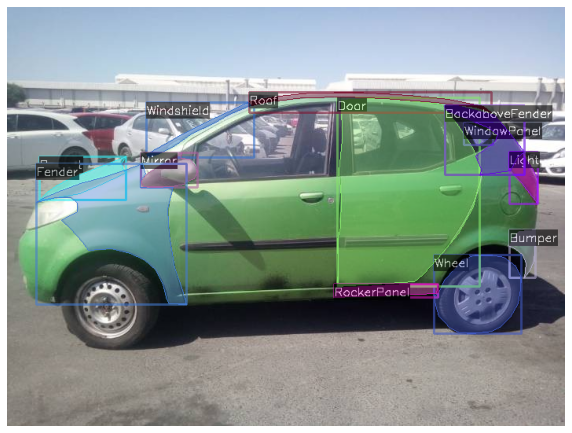

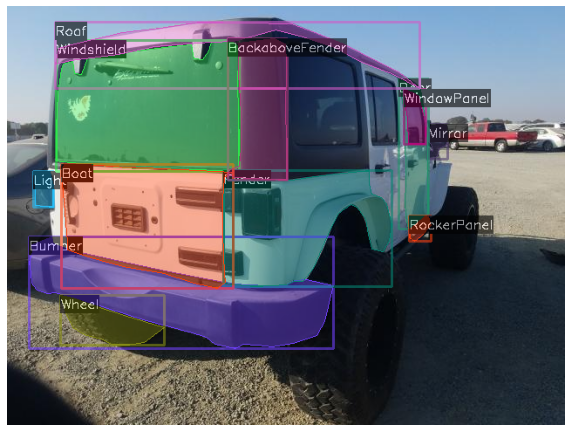

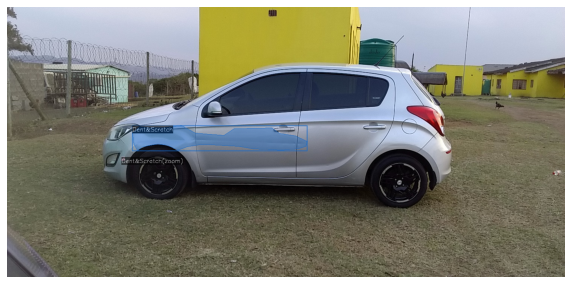

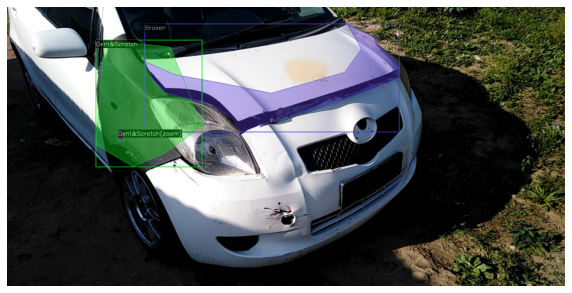

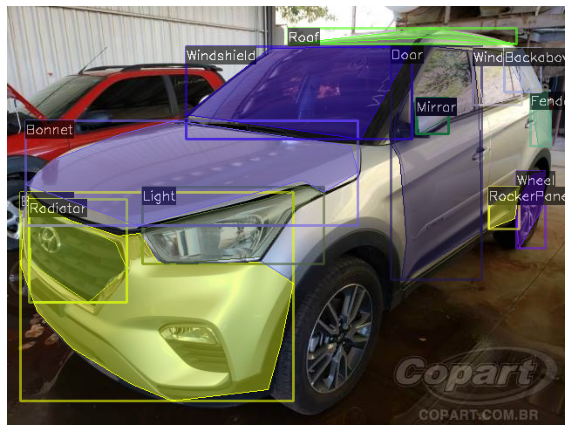

In [6]:
for image_file, data_file in zip(image_files, data_files):

    img = cv2.imread(image_file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    f = open(data_file)
    data = json.load(f)
    f.close()

    area = {}
    for i in range(len(data)):
        height, width, channels = img.shape
        try:
            x = []
            y = []
            label = data[i]["value"]["polygonlabels"]
            for point in data[i]["value"]["points"]:
                x.append(point[0])
                y.append(point[1])

            def denormalize(value, axis):
                if axis == "x":
                    return (value * width) / 100
                elif axis == "y":
                    return (value * height) / 100

            x = np.array([denormalize(i, "x") for i in x], np.int32)
            y = np.array([denormalize(i, "y") for i in y], np.int32)
            start_point = min(x), max(y)
            end_point = max(x), min(y)
            label_text = min(x), min(y) - 10

            points = [[i, j] for i, j in zip(x, y)]

            label = data[i]["value"]["polygonlabels"][0]
            area[label] = points

        except:
            pass

    image = img.copy()
    overlay = image.copy()
    for label in list(area.keys()):
        r = random.randint(0, 255)
        g = random.randint(0, 255)
        b = random.randint(0, 255)
        rand_color = (r, g, b)

        pts = np.array(area[label])
        x = [a[0] for a in pts]
        y = [a[1] for a in pts]
        e = 0
        x1 = min(x) - e
        y1 = min(y) + e
        x2 = max(x) + e
        y2 = max(y) - e

        font = cv2.FONT_HERSHEY_SIMPLEX
        fontScale = 0.5
        fontColor = (0, 0, 0)
        thickness = 1
        lineType = 1

        image = cv2.polylines(img, [pts], True, rand_color, 1)
        image = cv2.rectangle(image, (x1, y2), (x2, y1), rand_color, 2)

        (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
        cv2.rectangle(image, (x1, y1 + 20), (x1 + w, y1), (0, 0, 0), -1)
        cv2.putText(
            image,
            label,
            (x1, y1 + 15),
            font,
            fontScale,
            (255, 255, 255),
            thickness,
            lineType,
        )

        cv2.fillPoly(overlay, [pts], rand_color)
        alpha = 0.4
    out = cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0)
    plt.figure(figsize=(10, 10))
    plt.imshow(out)
    plt.axis("off")
    plt.show()
